### Problem Setup

We can use the ```pickle``` library to make loading the data for HW 3 easier. ```pickle``` is a library for serializing arbitrary Python objects; i.e., it is a way to turn a Python object into a series of bytes (that can then be written to a file, for instance).

I have taken the first 400 rows from the National Survey of Family Growth and then reduced it to focus on just two colums:

* ```birthord``` is the order of the birth. I.e., birthord==n indicates that it is a woman's $n$th child

* ```prglngth``` is the length of the pregnancy in weeks.

Be sure you have downloaded the file ```hw3.pickle``` and have it in the same directory as this Jupyter notebook. 

Then you can open the file and import the data as follows. (Here "rb" indicates that the file is being opened read-binary.)

In [1]:
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy.random as npr
import numpy as np

In [2]:
f=open("hw3.pickle","rb")

In [3]:
df=pickle.load(f)

In [4]:
f.close()

If you have successfully loaded the dataframe from the pickle file, then you will have not seen any error messages,and you will be able to look at the dataframe:

In [5]:
df

,index,birthord,prglngth
0,0,1.0,39
1,1,2.0,39
2,2,1.0,39
3,3,2.0,39
4,4,3.0,39
5,5,1.0,38
6,6,2.0,40
7,7,3.0,42
8,8,1.0,39
9,9,2.0,35


### Questions

Many people believe that women's first babies are born later (in terms of pregnancy length, measured in weeks) than their other babies. In this problem, you will test that hypothesis. The first step is to divide the dataset into two subsets: first babies and other babies. Then:

1. Plot (on the same graph) histograms for the two data sets. Adjust the number of bins to make the histograms show the data well. Use transparency to make the overlapping histograms more understandable. Label the x- and y- axes, and add a legend.

In [6]:
first_babies = df.loc[df['birthord'] == 1];
other_babies = df.loc[df['birthord'] != 1];

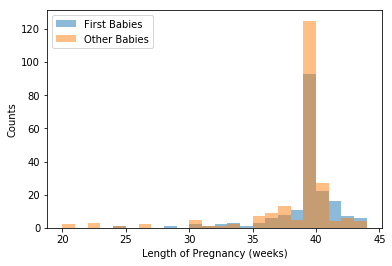

In [7]:
num_bins=range(20,45)
alpha_val = 0.5
plt.hist(first_babies['prglngth'], bins=num_bins, alpha=alpha_val, label="First Babies");
plt.hist(other_babies['prglngth'], bins=num_bins, alpha=alpha_val, label="Other Babies");
plt.legend();
plt.xlabel("Length of Pregnancy (weeks)");
plt.ylabel("Counts");

2. Find the average pregnancy lengths for both subsets of the data. Do the calculated average pregnancy lengths support the hypothesis that women's first babies are born later than their other babies? Using a two-sided binary hypothesis test, determine if any observed difference in average pregnancy lengths is statistically significant (at the $p<=0.05$ level).

In [8]:
first_babies_mean = first_babies['prglngth'].mean()
other_babies_mean = other_babies['prglngth'].mean()
diff = first_babies_mean - other_babies_mean

print('The average pregnancy length for the first born babies is',first_babies_mean, 'weeks.')
print('The average pregnancy length for the babies NOT born first is',other_babies_mean, 'weeks.')
print("The difference of the two sample means is ", diff, ".",sep="")

The average pregnancy length for the first born babies is 38.75409836065574 weeks.
The average pregnancy length for the babies NOT born first is 37.99078341013825 weeks.
The difference of the two sample means is 0.7633149505174899.


In [9]:
pooled = np.array(df['prglngth'])
# stacked = np.vstack((rate2005,rate2014))

num_sims=50000
event_count=0
bs_stats = []
for sim in range(num_sims):
    sample_first = npr.choice(pooled, size=183)
    sample_others = npr.choice(pooled, size=217)
    # Bootstrap samples DO NOT have to be the same size
    # They should be the sizes of the original sample
    mean_first  = sample_first.mean()
    mean_others = sample_others.mean()
    sample_diff = mean_first-mean_others
    abs_sample_diff = abs(sample_diff)
    bs_stats += [abs_sample_diff]
    if abs_sample_diff >= diff:
        event_count+=1
        
prob = event_count/num_sims
print("Under the null hypothesis, observe effect this large with prob =~ ",prob,".", sep="")

if prob <= 0.05:
    print("This is statistically significant at the p <= 0.05 level.")
else:
    print("This is not statistically significant at the p <= 0.05 level.")

Under the null hypothesis, observe effect this large with prob =~ 0.0188.
This is statistically significant at the p <= 0.05 level.


3. Find the 95% confidence interval for the average pregnancy lengths under the null hypothesis. Using this confidence interval, determine whether the null hypothesis should be rejected (i.e., the difference in average pregnancy lengths is statistically significant).

In [10]:
def confidence_interval(bs_stats, n):
    bs_stats.sort()
    x = (1-n/100)
    lower=int(len(bs_stats)*x/2)
    upper=int(len(bs_stats)-lower-1)
    bs_stats[lower],bs_stats[upper]
    print('The ',n,'% confidence interval is [',bs_stats[lower],', ',bs_stats[upper],'].',sep="")
    return bs_stats[lower],bs_stats[upper]

In [11]:
lower,upper = confidence_interval(bs_stats, 95)
if lower <= diff <= upper: 
    print("Using the confidence interval, I have determined that the null hypothesis should not be rejected as the mean pregnancy length diff that was observed between first babies and other babies does indeed fall within the confidence interval.")
else:
    print("Using the confidence interval, I have determined that the null hypothesis should be rejected as the mean pregnancy length diff that was observed between first babies and other babies does not fall within the confidence interval.")

The 95% confidence interval is [0.010500868776915695, 0.7282113268363943].
Using the confidence interval, I have determined that the null hypothesis should be rejected as the mean pregnancy length diff that was observed between first babies and other babies does not fall within the confidence interval.


4. "Full term" is considered to be 40 weeks, and births from pregnancies over 40 weeks are considered "late". Find the proportion of births that had pregnancy lengths over 40 weeks for each subset of the data. Using a two-sided binary hypothesis test, determine if any observed difference  in the proportion of late births is statistically significant (at the $p<=0.05$ level).

In [12]:
full_term_first = first_babies.loc[first_babies['prglngth'] <= 40];
late_term_first = first_babies.loc[first_babies['prglngth'] >  40];
full_term_other = other_babies.loc[other_babies['prglngth'] <= 40];
late_term_other = other_babies.loc[other_babies['prglngth'] >  40];

In [13]:
# Sanity check
df.size-(full_term_first.size + late_term_first.size + full_term_other.size + late_term_other.size)

0

In [14]:
late_propor_first  = late_term_first.size/full_term_first.size
late_propor_others = late_term_other.size/full_term_other.size
diff_2 = late_propor_first - late_propor_others

print("The proportion of late to not late pregancies for first born children is ",late_propor_first,".",sep="")
print("The proportion of late to not late pregancies for children NOT born first is ",late_propor_others,".",sep="")
print("The difference of the two proportions is ",diff_2,".",sep="")

The proportion of late to not late pregancies for first born children is 0.18831168831168832.
The proportion of late to not late pregancies for children NOT born first is 0.06896551724137931.
The difference of the two proportions is 0.11934617107030901.


In [15]:
pooled_2 = np.array(df['prglngth'])
# stacked = np.vstack((rate2005,rate2014))

num_sims_2=50000
event_count_2=0
bs_stats_2 = []
for sim in range(num_sims_2):
    sample_first = npr.choice(pooled_2, size=183)
    sample_others = npr.choice(pooled_2, size=217)
    # Bootstrap samples DO NOT have to be the same size
    # They should be the sizes of the original sample
    
    full_term_first_sample = np.sum(sample_first<=40);
    late_term_first_sample = np.sum(sample_first>40);
    full_term_other_sample = np.sum(sample_others<=40);
    late_term_other_sample = np.sum(sample_others>40);
    
    late_propor_first_sample  = late_term_first_sample/full_term_first_sample
    late_propor_others_sample = late_term_other_sample/full_term_other_sample
    
    sample_diff_2 = late_propor_first_sample-late_propor_others_sample
    abs_sample_diff_2 = abs(sample_diff_2) #2-sided
    
    bs_stats_2 += [abs_sample_diff_2]
    if abs_sample_diff_2 >= diff_2:
        event_count_2+=1
        
prob_2 = event_count_2/num_sims_2

print("Under the null hypothesis, observe effect this large with prob =~ ",prob_2,".",sep="")

if prob_2 <= 0.05:
    print("This is statistically significant at the p <= 0.05 level.")
else:
    print("This is not statistically significant at the p <= 0.05 level.")

Under the null hypothesis, observe effect this large with prob =~ 0.0034.
This is statistically significant at the p <= 0.05 level.


5. Find the 95% confidence interval for the proportions of births over 40 weeks under the null hypothesis. Using this confidence interval, determine whether the null hypothesis should be rejected (i.e., the difference in average pregnancy lengths is statistically significant).

In [16]:
lower_2,upper_2 = confidence_interval(bs_stats_2, 95)
if lower_2 <= diff_2 <= upper_2: 
    print("Using the confidence interval, I have determined that the null hypothesis should not be rejected as the diff of the proportion of late to not late pregancies for first born children and other children does indeed fall within the confidence interval.")
else:
    print("Using the confidence interval, I have determined that the null hypothesis should be rejected as the diff of the proportion of late to not late pregancies for first born children and other children does NOT fall within the confidence interval.")

The 95% confidence interval is [0.0011665470208183787, 0.08989805375347545].
Using the confidence interval, I have determined that the null hypothesis should be rejected as the diff of the proportion of late to not late pregancies for first born children and other children does NOT fall within the confidence interval.


6. Write a couple sentences to explain your results.

## Results
For both of these problems, I found the numbers to be statistically significant and I rejected the null hypothesis. We saw that you should expect the pregnancy length of a women's first born to be longer than their other babies. We also saw that a women's first babies has a much larger proportion of late to not late pregnancies than their other babies.

In conclusion, we can assume the effect is real. Women's first babies are born later (in terms of pregnancy length, measured in weeks) than their other babies.